[View in Colaboratory](https://colab.research.google.com/github/indrajitrdas/CSCG/blob/master/CSCG_Assignment.ipynb)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving sonar.csv to sonar.csv


# **Importing Required Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# **EDA and Standard Scaling**

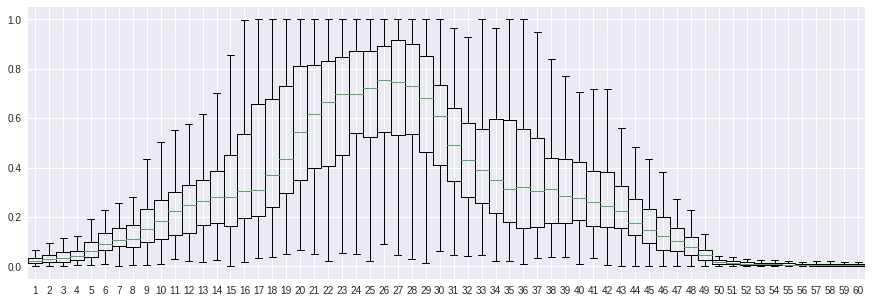

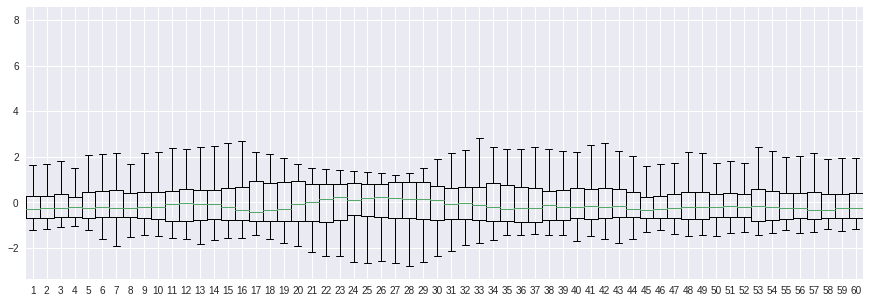

In [30]:
df = pd.read_csv('sonar.csv', header = None)
df = df.sample(frac = 1)
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
plt.figure(figsize=(15, 5))
plt.boxplot(X, widths=1)
plt.show()
ss = StandardScaler()
X = ss.fit_transform(X)
plt.figure(figsize=(15, 5))
plt.boxplot(X, widths=1)
plt.show()


# **Target Class Distribution**

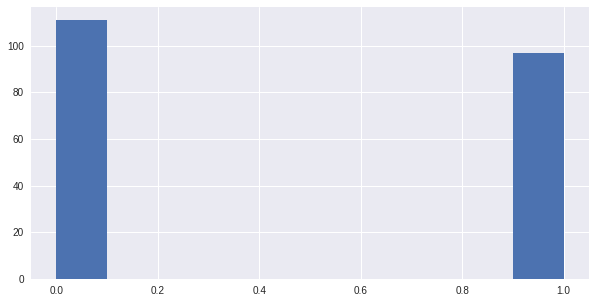

In [31]:
plt.figure(figsize=(10, 5))
plt.hist(y)
plt.show()

# **Dimentionality Reduction using PCA**
A principal component analysis models the variation of variables in terms of a smaller number of independent linear combinations (principal components). It is used for 
1. **Feature Elimination ** 
Eliminating features that provide little or no information to the predictive model makes the model simple thereby reducing traininf time and avoid overfitting.
2. **Feature Extraction**
Create new features from existing features which provides more information gain to the model.

Current observation:
1. For 80% variablity we need the first 12 components 
2. For 90% variablilty we need the first 20 components
3. For 95% variablilty we need the first 30 components

For our analysis we will create models with the follwoing two sets
1. All features (n =60)
2. 30 best components retieved after transformation

In [129]:
pca = PCA()
X_pca = pca.fit_transform(X)
pca_CompVsSum = {'Components':pca.explained_variance_ratio_, 'Cumsum':pca.explained_variance_ratio_.cumsum()}
components = pd.DataFrame(pca_CompVsSum)
print(components.head(30))
#Selecting the first 30 Compoments
X_pca30 = X_pca[:,0:30]
print(X_pca.shape)
print(X_pca30.shape)


    Components    Cumsum
0     0.203466  0.203466
1     0.188972  0.392438
2     0.085500  0.477938
3     0.056792  0.534730
4     0.050071  0.584800
5     0.040650  0.625450
6     0.032790  0.658240
7     0.030465  0.688705
8     0.025660  0.714364
9     0.024911  0.739275
10    0.020753  0.760028
11    0.019020  0.779048
12    0.017470  0.796518
13    0.015385  0.811903
14    0.014278  0.826181
15    0.013610  0.839790
16    0.012346  0.852136
17    0.011686  0.863823
18    0.010308  0.874131
19    0.009790  0.883921
20    0.009441  0.893361
21    0.008876  0.902237
22    0.008399  0.910636
23    0.007708  0.918344
24    0.007219  0.925563
25    0.006964  0.932527
26    0.006154  0.938681
27    0.005316  0.943997
28    0.005247  0.949244
29    0.004954  0.954198
(208, 60)
(208, 30)


# **Cross-Validation Parameters**

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_cv = KFold(n_splits = 5, shuffle=True, random_state=1)

# **Notes**
1. The following algorithms can have different accuracy levels based on the randomness in the parameters. 

2. A GridSearch can be performed to find the best set of parameters.

3. Parameters that results in the best accuracy can be saved for predicting new samples. 

4. Since traget class is well balanced I have not used** Precision, Recall and F1 Score** as evaluation metric.

# **Classification 1 : Logistic Regression**

In [188]:
model_lr = LogisticRegression(solver = 'newton-cg', penalty='l2')
model_lr_results = cross_val_score(model_lr, X, y, cv = k_cv)
model_lr_pca30_results = cross_val_score(model_lr, X_pca30, y, cv = k_cv)
print(model_lr_results.mean())
print(model_lr_pca30_results.mean())

0.7603948896631824
0.7603948896631824


# **Classification 2 : XGBoost**

In [190]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb_results = cross_val_score(model_xgb, X, y, cv = k_cv)
model_xgb_pca30_results = cross_val_score(model_xgb, X_pca30, y, cv = k_cv)
print(model_xgb_results.mean())
print(model_xgb_pca30_results.mean())

0.8419279907084786
0.7740998838559813


# **Classification 3 : RandomForrest**

In [199]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100)
model_rfc_results = cross_val_score(model_rfc, X, y, cv = k_cv)
model_rfc_pca30_results = cross_val_score(model_rfc, X_pca30, y, cv = k_cv)
print(model_rfc_results.mean())
print(model_rfc_pca30_results.mean())


0.8463414634146341
0.7548199767711963


# **Classification 4 : SVM**

In [206]:
model_svc = SVC(kernel = 'poly')
model_svc_results = cross_val_score(model_svc, X, y, cv = k_cv)
model_svc_pca30_results = cross_val_score(model_svc, X_pca30, y, cv = k_cv)
print(model_svc_results.mean())
print(model_svc_pca30_results.mean())

0.7979094076655053
0.8267131242740998


# **Classification 5 : KNeighborsClassifier**

In [209]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(3)
model_KNN_results = cross_val_score(model_KNN, X, y, cv = k_cv)
model_KNN_pca30_results = cross_val_score(model_KNN, X_pca30, y, cv = k_cv)
print(model_KNN_results.mean())
print(model_KNN_pca30_results.mean())

0.8506387921022066
0.8508710801393727


# **Classification 6 : Deep NN Classifier using Keras/Tensorflow**
Network Structure
1. Layer 1 = 64 units
2. Layer 2 = 64 units
3. layer 3 = 1 unit

## No Crossvalidation
## Test data size = 20% 
 

In [181]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from keras.optimizers import SGD
classifier = Sequential()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 60))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 20, nb_epoch = 100)
test_loss, test_acc = classifier.evaluate(X_test, y_test)
test_acc

Epoch 1/100
166/166 [==============================] - 1s 7ms/step - loss: 0.6920 - acc: 0.5602
Epoch 2/100
166/166 [==============================] - 0s 143us/step - loss: 0.6828 - acc: 0.7289
Epoch 3/100
166/166 [==============================] - 0s 120us/step - loss: 0.6608 - acc: 0.7590
Epoch 4/100
166/166 [==============================] - 0s 123us/step - loss: 0.6132 - acc: 0.7952
Epoch 5/100
166/166 [==============================] - 0s 125us/step - loss: 0.5345 - acc: 0.8253
Epoch 6/100
166/166 [==============================] - 0s 163us/step - loss: 0.4499 - acc: 0.8313
Epoch 7/100
166/166 [==============================] - 0s 152us/step - loss: 0.3693 - acc: 0.8675
Epoch 8/100
166/166 [==============================] - 0s 137us/step - loss: 0.3112 - acc: 0.8735
Epoch 9/100
166/166 [==============================] - 0s 130us/step - loss: 0.2600 - acc: 0.8976
Epoch 10/100
166/166 [==============================] - 0s 151us/step - loss: 0.2203 - acc: 0.9277
Epoch 11/100
166/166 

0.9523809523809523

# **Classification 7 : Deep NN Classifier using KerasClassifier with Crossvalidation**
Network Structure
1. Layer 1 = 64 units
2. Layer 2 = 64 units
3. Layer 3 = 64 units
4. Layer 4 = 1 unit


In [136]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
	# create model
  model = Sequential()
  model.add(Dense(64, input_dim=60, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=15, shuffle=True, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8735531160464653


## **Results**

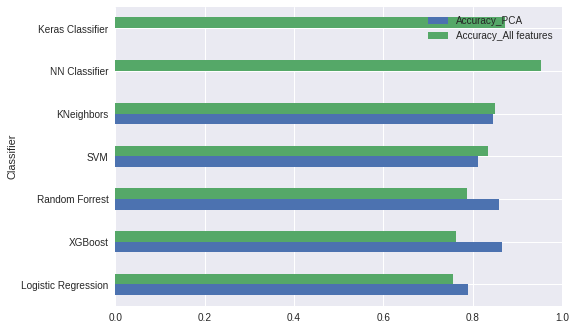

In [182]:
Results = [['Logistic Regression', model_lr_results.mean(), model_lr_pca30_results.mean() ],
           ['XGBoost', model_xgb_results.mean(), model_xgb_pca30_results.mean()],
           ['Random Forrest', model_rfc_results.mean(), model_rfc_pca30_results.mean()],
           ['SVM', model_svc_results.mean(), model_svc_pca30_results.mean()],
           ['KNeighbors', model_KNN_results.mean(), model_KNN_pca30_results.mean()],
           ['NN Classifier',0,test_acc],
           ['Keras Classifier',0,results.mean()]
           ]

ConsolidatedResults = pd.DataFrame(Results, columns = ['Classifier','Accuracy_PCA', 'Accuracy_All features'] )
ConsolidatedResults.plot.barh(x = 'Classifier')
plt.show()
